In [1]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import pandas as pd

In [2]:
data = pd.read_csv("data/all_data.csv")
target = data.iloc[:,85]
features = data.iloc[:,1:85]

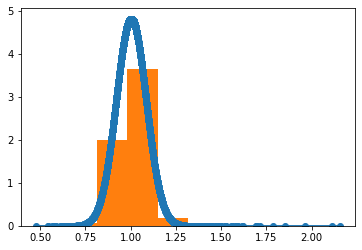

In [3]:
sorted_target = sorted(target)

fit = stats.norm.pdf(sorted_target, np.mean(sorted_target), np.std(sorted_target))  #this is a fitting indeed

pl.plot(sorted_target,fit,'-o')

pl.hist(sorted_target,density=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 

In [4]:
print(type(target))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
data_max = max(target)
data_min = min(target)
data_range = data_max - data_min
print(data_range, data_max, data_min)

df = data.iloc[:,1:]
df

1.6814339011044555 2.158060831840756 0.4766269307363007


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.000000,0.000000,-1.000000,0.765222,-77.153948,100.000000,0.354421,0.000000,-267.438456,0.228461,...,0.741254,-82.376508,52.134155,6.632972,0.000000,-145.653123,0.176235,0.999068,0.000000,0.917195
1,0.000000,-19.269571,-1.000000,0.741254,-282.908684,0.000000,-0.001874,0.000000,-286.708028,-1.829087,...,0.741254,-74.895327,53.960325,7.737497,0.000000,-138.004542,0.251047,0.999068,0.000000,1.070974
2,0.000000,53.697913,-1.000000,0.741254,438.066444,82.524541,0.713415,0.000000,-259.859071,5.380664,...,0.741254,-52.952915,58.911769,8.575745,0.000000,-130.137081,0.470471,0.999068,0.000000,0.951560
3,0.000000,178.444487,-1.000000,0.741254,12.658751,92.757045,5.757982,0.000000,-200.377576,1.126588,...,0.741254,-69.991872,54.050572,7.763921,0.000000,-107.700809,0.300081,0.999068,0.000000,0.943828
4,0.000000,114.626319,-1.000000,0.741254,-91.291578,50.003979,5.468393,0.000000,-171.720996,0.087084,...,0.741254,-71.095124,53.741353,7.098725,0.000000,-79.085860,0.289049,0.999068,0.000000,0.871262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10154,0.985976,0.894567,1.006336,48.000000,2.793062,1.001173,0.922541,0.827488,891.495321,0.914848,...,24.000000,-2.084158,0.995109,0.593247,0.370577,861.940620,1.166642,1.000287,47.873165,0.913916
10155,0.998621,0.894783,1.004395,44.000000,9.737954,1.000621,0.507849,0.806466,866.491970,0.896696,...,20.000000,-6.848505,0.989094,0.076856,0.260252,855.841752,1.281253,0.998892,8.192992,1.018863
10156,0.997993,0.890861,0.995688,40.000000,-6.024870,0.996708,0.294143,0.556294,862.976930,1.130891,...,16.000000,0.070078,0.991300,0.680244,0.394779,854.548326,1.014084,0.992495,47.559919,1.013033
10157,1.000098,0.891527,0.998571,36.000000,3.550548,0.998021,0.630335,0.421817,861.631161,1.245402,...,12.000000,1.204299,0.992909,0.627318,0.450706,852.628693,1.067194,0.996860,53.522837,0.936996


In [6]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("data/all_data.csv")
target = data.iloc[:,85]
features = data.iloc[:,1:85]

# 60-20-20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {"criterion": ["mse", "friedman_mse", "mae", "poisson"],
          "splitter": ["best", "random"]
}

regressor = DecisionTreeRegressor()

clf = GridSearchCV(regressor, params, verbose=2, cv=2)

# regressor = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

clf.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_squared_error(y_test, preds)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .......................criterion=mse, splitter=best; total time=   0.7s
[CV] END .......................criterion=mse, splitter=best; total time=   0.6s
[CV] END .....................criterion=mse, splitter=random; total time=   0.0s
[CV] END .....................criterion=mse, splitter=random; total time=   0.0s
[CV] END ..............criterion=friedman_mse, splitter=best; total time=   0.7s
[CV] END ..............criterion=friedman_mse, splitter=best; total time=   0.6s
[CV] END ............criterion=friedman_mse, splitter=random; total time=   0.0s
[CV] END ............criterion=friedman_mse, splitter=random; total time=   0.0s
[CV] END .......................criterion=mae, splitter=best; total time=  31.4s
[CV] END .......................criterion=mae, splitter=best; total time=  16.9s
[CV] END .....................criterion=mae, splitter=random; total time=   7.0s
[CV] END .....................criterion=mae, spli

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
sorted(clf.cv_results_.keys())

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
print(type(preds))
print(type(y_test.to_numpy()))

y_test = y_test.to_numpy()
preds
y_test

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([1.01111969, 0.87776167, 0.93893613, ..., 0.9894168 , 1.        ,
       0.94943662])

In [ ]:
pred_yon = []
gercek_yon = []

for i in range(len(preds)):
    if preds[i] < 1:
        pred_yon.append("neg")
    else:
        pred_yon.append("pos")

    if y_test[i] < 1:
        gercek_yon.append("neg")
    else:
        gercek_yon.append("pos")

from sklearn.metrics import accuracy_score
accuracy_score(pred_yon, gercek_yon)

0.4881889763779528